# Python Tutorial

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

# 1. Reading in Data and Basic Statistical Functions

## 1.1 Read in the data.

### a) Read the data in as a .csv file

In [2]:
# you may change to your own data directory
student = pd.read_csv('data/class.csv')

### b) Read the data in as a .xls file.

In [3]:
# Notice you must specify the file location, as well as the name of the sheet of the .xls file you want to import
student_xls = pd.read_excel(open('data/class.xls', 'rb'), sheetname = 'class')

### c) Read the data in as a .json file.

In [4]:
student_json = pd.read_json('data/class.json')

## 1.2 Find the dimensions of the data set.

In [5]:
# Since the "student" data frame has been loaded in Section 1.1 a), it is not necessary to load again. 
print(student.shape) # "print" can be omitted in Jupyter notebook. However, in other compilers, such as IDLE, it is required.

(19, 5)


## 1.3 Find basic information about the data set.

In [6]:
student.info() # "print" is omitted here. Remember to write "print" in other compilers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
Name      19 non-null object
Sex       19 non-null object
Age       19 non-null int64
Height    19 non-null float64
Weight    19 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 840.0+ bytes


## 1.4 Look at the first 5 (last 5) observations.

In [7]:
student.head()

,Name,Sex,Age,Height,Weight
0,Alfred,M,14,69.0,112.5
1,Alice,F,13,56.5,84.0
2,Barbara,F,13,65.3,98.0
3,Carol,F,14,62.8,102.5
4,Henry,M,14,63.5,102.5


In [8]:
student.tail()

,Name,Sex,Age,Height,Weight
14,Philip,M,16,72.0,150.0
15,Robert,M,12,64.8,128.0
16,Ronald,M,15,67.0,133.0
17,Thomas,M,11,57.5,85.0
18,William,M,15,66.5,112.0


## 1.5 Calculate means of numeric variables.

In [9]:
student.mean()

Age        13.315789
Height     62.336842
Weight    100.026316
dtype: float64

## 1.6 Compute summary statistics of the data set.

In [10]:
student.describe()

,Age,Height,Weight
count,19.000000,19.000000,19.000000
mean,13.315789,62.336842,100.026316
std,1.492672,5.127075,22.773933
min,11.000000,51.300000,50.500000
25%,12.000000,58.250000,84.250000
50%,13.000000,62.800000,99.500000
75%,14.500000,65.900000,112.250000
max,16.000000,72.000000,150.000000


## 1.7 Descriptive statistics functions applied to variables of the data set.

In [11]:
# Notice the subsetting of student with [] and the name of the variable in quotes ("")
student["Weight"].std()

22.773933493879046

In [12]:
student["Weight"].sum()

1900.5

In [13]:
student["Weight"].count()

19

In [14]:
student["Weight"].max()

150.0

In [15]:
student["Weight"].min()

50.5

In [16]:
student["Weight"].median()

99.5

## 1.8 Produce a one-way table to describe the frequency of a variable.

### a) Produce a one-way table of a discrete variable.

In [17]:
# columns = "count" indicates to make the descriptive portion of the table 
# the counts of each level of the index variable
pd.crosstab(index = student["Age"], columns = "count")

col_0,count
Age,
11,2
12,5
13,3
14,4
15,4
16,1


### b) Produce a one-way table of a categorical variable.

In [18]:
pd.crosstab(index = student["Sex"], columns = "count")

col_0,count
Sex,
F,9
M,10


## 1.9 Produce a two-way table to describe the frequency of two categorical or discrete variables.

In [19]:
# Notice the specification of a variable for the columns argument, instead of "count"
pd.crosstab(index = student["Age"], columns = student["Sex"])

Sex,F,M
Age,,
11,1,1
12,2,3
13,2,1
14,2,2
15,2,2
16,0,1


## 1.10 Select a subset of the data that meets a certain criterion.

In [20]:
females = student.query('Sex == "F"')
females.head()

,Name,Sex,Age,Height,Weight
1,Alice,F,13,56.5,84.0
2,Barbara,F,13,65.3,98.0
3,Carol,F,14,62.8,102.5
6,Jane,F,12,59.8,84.5
7,Janet,F,15,62.5,112.5


## 1.11 Determine the correlation between two continuous variables.

In [21]:
# axis = 1 option indicates to concatenate column-wise
height_weight = pd.concat([student["Height"], student["Weight"]], axis = 1)
height_weight.corr(method = "pearson")

,Height,Weight
Height,1.000000,0.877785
Weight,0.877785,1.000000


# 2 Basic Graphing and Plotting Functions

In [22]:
# import library
import matplotlib.pyplot as plt
# the following line is used when plotting in Jupyter notebook
%matplotlib inline

## 2.1 Visualize a single continuous variable by producing a histogram.

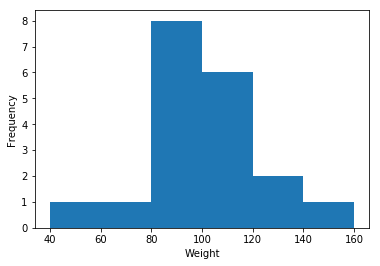

In [23]:
# Notice the labeling of the axes
plt.hist(student["Weight"], bins = [40,60,80,100,120,140,160])
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

## 2.2 Visualize a single continuous variable by producing a boxplot.

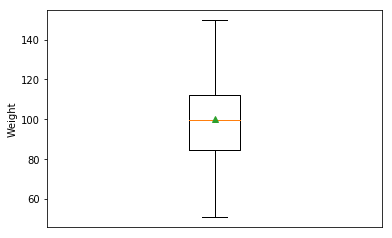

In [24]:
# showmeans = True tells Python to plot the mean of the variable on the boxplot 
plt.boxplot(student["Weight"], showmeans = True)

# prevents Python from printing a "1" at the bottom of the boxplot
plt.xticks([])

plt.ylabel('Weight')
plt.show()

## 2.3 Visualize two continuous variables by producing a scatterplot.

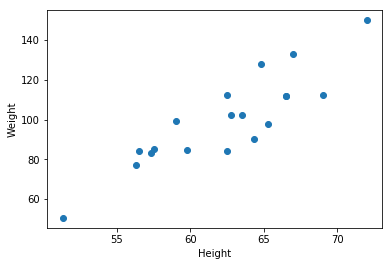

In [25]:
# Notice here you specify the x variable, followed by the y variable 
plt.scatter(student["Height"], student["Weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## 2.4 Visualize a relationship between two continuous variables by producing a scatterplot and a plotted line of best fit.

In [26]:
x = student["Height"]
y = student["Weight"]

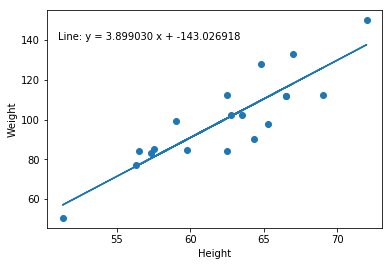

In [27]:
# scatter plot
plt.scatter(x, y)

# np.polyfit() models Weight as a function of Height and returns the parameters
m, b = np.polyfit(x, y, 1)

# plt.text() prints the equation of the line of best fit, with the first two 
# arguments specifying the x and y locations of the text, respectively 
# "%f" indicates to print a floating point number, that is specified following
# the string and a "%" character
plt.text(51, 140, "Line: y = %f x + %f"% (m, b))
plt.plot(x, m * x + b)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## 2.5 Visualize a categorical variable by producing a bar chart.

In [28]:
# Get the counts of Sex 
counts = pd.crosstab(index = student["Sex"], columns = "count")

In [29]:
# len() returns the number of categories of Sex (2)
# np.arange() creates a vector of the specified length
num = np.arange(len(counts))

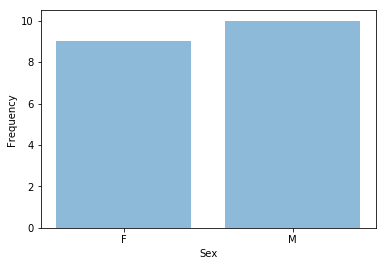

In [30]:
# alpha = 0.5 changes the transparency of the bars
plt.bar(num, counts["count"], align = 'center', alpha = 0.5)

# Set the xticks to be the indices of counts
plt.xticks(num, counts.index)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

## 2.6 Visualize a continuous variable, grouped by a categorical variable, by producing side-by-side boxplots.

### a) Simple side-by-side boxplot without color.

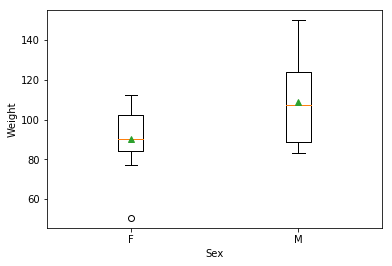

In [31]:
# Subset data set to return only female weights, and then only male weights 
Weight_F = np.array(student.query('Sex == "F"')["Weight"])
Weight_M = np.array(student.query('Sex == "M"')["Weight"])
Weights = [Weight_F, Weight_M]

# PyPlot automatically plots the two weights side-by-side since Weights is a 2D array
plt.boxplot(Weights, showmeans = True, labels = ('F', 'M'))
plt.xlabel('Sex')
plt.ylabel('Weight')
plt.show()

### b) More advanced side-by-side boxplot with color.

In [32]:
# impory library
import seaborn as sns

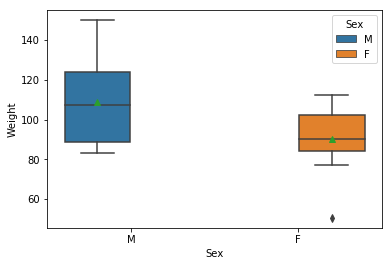

In [33]:
sns.boxplot(x = "Sex", y = "Weight", hue = "Sex", data = student, showmeans = True)

# 3 Basic Data Wrangling and Manipulation

## 3.1 Create a new variable in a data set as a function of existing variables in the data set.

In [34]:
# Notice here how you can create the BMI column in the data set just by naming it 
student["BMI"] = student["Weight"] / student["Height"] ** 2 * 703
student.head()

,Name,Sex,Age,Height,Weight,BMI
0,Alfred,M,14,69.0,112.5,16.611531
1,Alice,F,13,56.5,84.0,18.498551
2,Barbara,F,13,65.3,98.0,16.156788
3,Carol,F,14,62.8,102.5,18.270898
4,Henry,M,14,63.5,102.5,17.870296


## 3.2 Create a new variable in a data set using if/else logic of existing variables in the data set.

In [35]:
# Notice the use of the np.where() function for a single condition 
student["BMI Class"] = np.where(student["BMI"] < 19.0, "Underweight", "Healthy")
student.head()

,Name,Sex,Age,Height,Weight,BMI,BMI Class
0,Alfred,M,14,69.0,112.5,16.611531,Underweight
1,Alice,F,13,56.5,84.0,18.498551,Underweight
2,Barbara,F,13,65.3,98.0,16.156788,Underweight
3,Carol,F,14,62.8,102.5,18.270898,Underweight
4,Henry,M,14,63.5,102.5,17.870296,Underweight


## 3.3 Create new variables in a data set using mathematical functions applied to existing variables in the data set.

In [36]:
student["LogWeight"] = np.log(student["Weight"])
student["ExpAge"] = np.exp(student["Age"])
student["SqrtHeight"] = np.sqrt(student["Height"])
student["BMI Neg"] = np.where(student["BMI"] < 19.0, -student["BMI"], student["BMI"])
student["BMI Pos"] = np.abs(student["BMI Neg"])

# Create a Boolean variable
student["BMI Check"] = (student["BMI Pos"] == student["BMI"])
student.head()

,Name,Sex,Age,Height,Weight,BMI,BMI Class,LogWeight,ExpAge,SqrtHeight,BMI Neg,BMI Pos,BMI Check
0,Alfred,M,14,69.0,112.5,16.611531,Underweight,4.722953,1.202604e+06,8.306624,-16.611531,16.611531,True
1,Alice,F,13,56.5,84.0,18.498551,Underweight,4.430817,4.424134e+05,7.516648,-18.498551,18.498551,True
2,Barbara,F,13,65.3,98.0,16.156788,Underweight,4.584967,4.424134e+05,8.080842,-16.156788,16.156788,True
3,Carol,F,14,62.8,102.5,18.270898,Underweight,4.629863,1.202604e+06,7.924645,-18.270898,18.270898,True
4,Henry,M,14,63.5,102.5,17.870296,Underweight,4.629863,1.202604e+06,7.968689,-17.870296,17.870296,True


## 3.4 Drop variables from a data set.

In [37]:
# axis = 1 indicates to drop columns instead of rows
student = student.drop(["LogWeight", "ExpAge", "SqrtHeight", "BMI Neg", 
                        "BMI Pos", "BMI Check"], axis = 1)
student.head()

,Name,Sex,Age,Height,Weight,BMI,BMI Class
0,Alfred,M,14,69.0,112.5,16.611531,Underweight
1,Alice,F,13,56.5,84.0,18.498551,Underweight
2,Barbara,F,13,65.3,98.0,16.156788,Underweight
3,Carol,F,14,62.8,102.5,18.270898,Underweight
4,Henry,M,14,63.5,102.5,17.870296,Underweight


## 3.5 Sort a data set by a variable.

### a) Sort data set by a continuous variable.

In [38]:
# Notice kind = "mergesort" which indicates to use a stable sorting algorithm 
student = student.sort_values(by = "Age", kind = "mergesort")
student.head()

,Name,Sex,Age,Height,Weight,BMI,BMI Class
10,Joyce,F,11,51.3,50.5,13.490001,Underweight
17,Thomas,M,11,57.5,85.0,18.073346,Underweight
5,James,M,12,57.3,83.0,17.771504,Underweight
6,Jane,F,12,59.8,84.5,16.611531,Underweight
9,John,M,12,59.0,99.5,20.094369,Healthy


### b) Sort data set by a categorical variable.

In [39]:
student = student.sort_values(by = "Sex", kind = "mergesort")
# Notice that the data is now sorted first by Sex and then within Sex by Age 
student.head()

,Name,Sex,Age,Height,Weight,BMI,BMI Class
10,Joyce,F,11,51.3,50.5,13.490001,Underweight
6,Jane,F,12,59.8,84.5,16.611531,Underweight
12,Louise,F,12,56.3,77.0,17.077695,Underweight
1,Alice,F,13,56.5,84.0,18.498551,Underweight
2,Barbara,F,13,65.3,98.0,16.156788,Underweight


## 3.6 Compute descriptive statistics of continuous variables, grouped by a categorical variable.

In [40]:
student.groupby(by = "Sex").mean()

,Age,Height,Weight,BMI
Sex,,,,
F,13.222222,60.588889,90.111111,17.051039
M,13.400000,63.910000,108.950000,18.594243


## 3.7 Add a new row to the bottom of a data set.

In [41]:
# Look at the tail of the data currently
student.tail()

,Name,Sex,Age,Height,Weight,BMI,BMI Class
0,Alfred,M,14,69.0,112.5,16.611531,Underweight
4,Henry,M,14,63.5,102.5,17.870296,Underweight
16,Ronald,M,15,67.0,133.0,20.828470,Healthy
18,William,M,15,66.5,112.0,17.804511,Underweight
14,Philip,M,16,72.0,150.0,20.341435,Healthy


In [42]:
# add a new row to the bottom of a data set
student = student.append({'Name':'Jane', 'Sex':'F', 'Age':14, 'Height':56.3, 
                          'Weight':77.0, 'BMI':17.077695, 
                          'BMI Class': 'Underweight'}, 
                         ignore_index = True)

In [43]:
# Notice the change in the indices because of the ignore_index=True option 
# which allows for a Series, or one-dimensional DataFrame, to be appended 
# to an existing DataFrame 

student.tail()

,Name,Sex,Age,Height,Weight,BMI,BMI Class
15,Henry,M,14,63.5,102.5,17.870296,Underweight
16,Ronald,M,15,67.0,133.0,20.828470,Healthy
17,William,M,15,66.5,112.0,17.804511,Underweight
18,Philip,M,16,72.0,150.0,20.341435,Healthy
19,Jane,F,14,56.3,77.0,17.077695,Underweight


## 3.8 Create a user-defined function and apply it to a variable in the data set to create a new variable in the data set.

In [44]:
def toKG(lb):
    return (0.45359237 * lb)

student["Weight KG"] = student["Weight"].apply(toKG)
student.head()

,Name,Sex,Age,Height,Weight,BMI,BMI Class,Weight KG
0,Joyce,F,11,51.3,50.5,13.490001,Underweight,22.906415
1,Jane,F,12,59.8,84.5,16.611531,Underweight,38.328555
2,Louise,F,12,56.3,77.0,17.077695,Underweight,34.926612
3,Alice,F,13,56.5,84.0,18.498551,Underweight,38.101759
4,Barbara,F,13,65.3,98.0,16.156788,Underweight,44.452052


# 4 More Advanced Data Wrangling

## 4.1 Drop observations with missing information.

In [45]:
# Notice the use of the fish data set because it has some missing observations 
fish = pd.read_csv('data/fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [46]:
# First sort by Weight, requesting those with NA for Weight first 
fish = fish.sort_values(by = 'Weight', kind = 'mergesort', na_position = 'first')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
13,Bream,NaN,29.5,32.0,37.3,13.9129,5.0728
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484


In [47]:
# drop na
new_fish = fish.dropna()
new_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


## 4.2 Merge two data sets together on a common variable.

### a) First, select specific columns of a data set to create two smaller data sets.

In [48]:
# Notice the use of the student data set again, however we want to reload it
# without the changes we've made previously 
student = pd.read_csv('data/class.csv')
student.head()

,Name,Sex,Age,Height,Weight
0,Alfred,M,14,69.0,112.5
1,Alice,F,13,56.5,84.0
2,Barbara,F,13,65.3,98.0
3,Carol,F,14,62.8,102.5
4,Henry,M,14,63.5,102.5


In [49]:
student1 = pd.concat([student["Name"], student["Sex"], student["Age"]], axis = 1)
student1.head()

,Name,Sex,Age
0,Alfred,M,14
1,Alice,F,13
2,Barbara,F,13
3,Carol,F,14
4,Henry,M,14


In [50]:
student2 = pd.concat([student["Name"], student["Height"], student["Weight"]], axis = 1)
student2.head()

,Name,Height,Weight
0,Alfred,69.0,112.5
1,Alice,56.5,84.0
2,Barbara,65.3,98.0
3,Carol,62.8,102.5
4,Henry,63.5,102.5


### b) Second, we want to merge the two smaller data sets on the common variable.

In [51]:
new = pd.merge(student1, student2, on = "Name")
new.head()

,Name,Sex,Age,Height,Weight
0,Alfred,M,14,69.0,112.5
1,Alice,F,13,56.5,84.0
2,Barbara,F,13,65.3,98.0
3,Carol,F,14,62.8,102.5
4,Henry,M,14,63.5,102.5


### c) Finally, we want to check to see if the merged data set is the same as the original data set.

In [52]:
student.equals(new)

True

## 4.3 Merge two data sets together by index number only.

### a) First, select specific columns of a data set to create two smaller data sets.

In [53]:
newstudent1 = pd.concat([student["Name"], student["Sex"], student["Age"]], axis = 1)
newstudent1.head()

,Name,Sex,Age
0,Alfred,M,14
1,Alice,F,13
2,Barbara,F,13
3,Carol,F,14
4,Henry,M,14


In [54]:
newstudent2 = pd.concat([student["Height"], student["Weight"]], axis = 1)
newstudent2.head()

,Height,Weight
0,69.0,112.5
1,56.5,84.0
2,65.3,98.0
3,62.8,102.5
4,63.5,102.5


### b) Second, we want to join the two smaller data sets.

In [55]:
new2 = newstudent1.join(newstudent2)
new2.head()

,Name,Sex,Age,Height,Weight
0,Alfred,M,14,69.0,112.5
1,Alice,F,13,56.5,84.0
2,Barbara,F,13,65.3,98.0
3,Carol,F,14,62.8,102.5
4,Henry,M,14,63.5,102.5


### c) Finally, we want to check to see if the joined data set is the same as the original data set.

In [56]:
student.equals(new2)

True

## 4.4 Create a pivot table to summarize information about a data set.

In [57]:
# Notice we are using a new data set that needs to be read into the environment 
price = pd.read_csv('data/price.csv')
price.head()

,COUNTRY,STATE,COUNTY,ACTUAL,PREDICT,PRODTYPE,PRODUCT,YEAR,QUARTER,MONTH,MONYR
0,U.S.A.,California,NaN,$987.36,$692.24,FURNITURE,SOFA,1995,1,Jan,JAN95
1,U.S.A.,California,NaN,"$1,782.96",$568.48,FURNITURE,SOFA,1995,1,Feb,FEB95
2,U.S.A.,California,NaN,$32.64,$16.32,FURNITURE,SOFA,1995,1,Mar,MAR95
3,U.S.A.,California,NaN,"$1,825.12",$756.16,FURNITURE,SOFA,1995,2,Apr,APR95
4,U.S.A.,California,NaN,$750.72,$723.52,FURNITURE,SOFA,1995,2,May,MAY95


In [58]:
# import libraries
from re import sub
from decimal import Decimal

In [59]:
# The following code is used to remove the "," and "$" characters from 
# the ACTUAL colum so that the values can be summed 

def trim_money(money):
    return(float(Decimal(sub(r'[^\d.]', '', money))))

price["REVENUE"] = price["ACTUAL"].apply(trim_money)

In [60]:
price.head()

,COUNTRY,STATE,COUNTY,ACTUAL,PREDICT,PRODTYPE,PRODUCT,YEAR,QUARTER,MONTH,MONYR,REVENUE
0,U.S.A.,California,NaN,$987.36,$692.24,FURNITURE,SOFA,1995,1,Jan,JAN95,987.36
1,U.S.A.,California,NaN,"$1,782.96",$568.48,FURNITURE,SOFA,1995,1,Feb,FEB95,1782.96
2,U.S.A.,California,NaN,$32.64,$16.32,FURNITURE,SOFA,1995,1,Mar,MAR95,32.64
3,U.S.A.,California,NaN,"$1,825.12",$756.16,FURNITURE,SOFA,1995,2,Apr,APR95,1825.12
4,U.S.A.,California,NaN,$750.72,$723.52,FURNITURE,SOFA,1995,2,May,MAY95,750.72


In [61]:
table = pd.pivot_table(price, 
                       index = ["COUNTRY", "STATE", "PRODTYPE", "PRODUCT"], 
                       values = "REVENUE", 
                       aggfunc = np.sum)
table.head()

REVENUE
COUNTRY STATE            PRODTYPE  PRODUCT          
Canada  British Columbia FURNITURE BED      197706.6
                                   SOFA     216282.6
                         OFFICE    CHAIR    200905.2
                                   DESK     186262.2
        Ontario          FURNITURE BED      194493.6

## 4.5 Return all unique values from a text variable.

In [62]:
np.unique(price["STATE"])

array(['Baja California Norte', 'British Columbia', 'California',
       'Campeche', 'Colorado', 'Florida', 'Illinois', 'Michoacan',
       'New York', 'North Carolina', 'Nuevo Leon', 'Ontario', 'Quebec',
       'Saskatchewan', 'Texas', 'Washington'], dtype=object)

# 5 Preparation & Basic Regression

## 5.1 Pre-process a data set using principal component analysis.

In [63]:
# Notice we are using a new data set that needs to be read into the environment 
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
features = iris.drop(["Target"], axis = 1)
features.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
# import library
from sklearn import preprocessing

In [66]:
features_scaled = preprocessing.scale(features.as_matrix())

In [67]:
# import library
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components = 4)
pca = pca.fit(features_scaled)
np.transpose(pca.components_)

array([[ 0.52237162,  0.37231836, -0.72101681, -0.26199559],
       [-0.26335492,  0.92555649,  0.24203288,  0.12413481],
       [ 0.58125401,  0.02109478,  0.14089226,  0.80115427],
       [ 0.56561105,  0.06541577,  0.6338014 , -0.52354627]])

## 5.2 Split data into training and testing data and export as a .csv file.

In [69]:
# import library
from sklearn.model_selection import train_test_split

In [70]:
target = iris["Target"]

In [71]:
# The following code splits the iris data set into 70% train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state = 29)

In [72]:
train_x = pd.DataFrame(X_train)
train_y = pd.DataFrame(Y_train)
test_x = pd.DataFrame(X_test)
test_y = pd.DataFrame(Y_test)

In [73]:
train = pd.concat([train_x, train_y], axis = 1)
test = pd.concat([test_x, test_y], axis = 1)

In [74]:
train.to_csv('data/iris_train_Python.csv', index = False)
test.to_csv('data/iris_test_Python.csv', index = False)

## 5.3 Fit a logistic regression model.

In [75]:
# import libraries
from pandas import to_datetime
from pandas import tseries

In [76]:
# Notice we are using a new data set that needs to be read into the environment 
tips = pd.read_csv('data/tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
# The following code is used to determine if the individual left more than a 15% tip 
tips["fifteen"] = 0.15 * tips["total_bill"]
tips["greater15"] = np.where(tips["tip"] > tips["fifteen"], 1, 0)
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,fifteen,greater15
0,0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485,0
1,1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510,1
2,2,21.01,3.50,Male,No,Sun,Dinner,3,3.1515,1
3,3,23.68,3.31,Male,No,Sun,Dinner,2,3.5520,0
4,4,24.59,3.61,Female,No,Sun,Dinner,4,3.6885,0


In [78]:
# import library
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [79]:
# Notice the syntax of greater15 as a function of total_bill 
logreg = sm.formula.glm("greater15 ~ total_bill", 
                       family = sm.families.Binomial(), 
                       data = tips).fit()
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              greater15   No. Observations:                  244
Model:                            GLM   Df Residuals:                      242
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -156.87
Date:                Sat, 19 Aug 2017   Deviance:                       313.74
Time:                        17:14:22   Pearson chi2:                     247.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6477      0.355      4.646      0.000       0.953       2.343
total_bill    -0.0725      0.017     -4.319      0.000      -0.105      -0.040
==============================================================================
"""

## 5.4 Fit a linear regression model.

In [80]:
# import library
from sklearn.linear_model import LinearRegression

In [81]:
linreg = LinearRegression()
linreg.fit(tips["total_bill"].values.reshape(-1, 1), tips["tip"]) # If your data has one feature, you need to reshape the 1D array

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
linreg.coef_, linreg.intercept_

(array([ 0.10502452]), 0.92026961355467396)

# 6 Supervised Machine Learning

## 6.1 Fit a logistic regression model on training data and assess against testing data.

### a) Fit a logistic regression model on training data.

In [83]:
# Notice we are using new data sets that need to be read into the environment 
train = pd.read_csv('data/tips_train.csv')
train.head()

,total_bill,smoker,size,male,tip
0,29.80,0,6,0,4.20
1,15.81,1,2,1,3.16
2,15.53,1,2,1,3.00
3,18.24,0,2,1,3.76
4,16.21,0,3,0,2.00


In [84]:
test = pd.read_csv('data/tips_test.csv')
test.head()

,total_bill,smoker,size,male,tip
0,20.29,1,2,1,3.21
1,14.48,1,2,1,2.00
2,13.00,1,2,0,2.00
3,23.10,1,3,1,4.00
4,28.44,1,2,1,2.56


In [85]:
train["fifteen"] = 0.15 * train["total_bill"]
train["greater15"] = np.where(train["tip"] > train["fifteen"], 1, 0)
test["fifteen"] = 0.15 * test["total_bill"]
test["greater15"] = np.where(test["tip"] > test["fifteen"], 1, 0)

In [86]:
train.head()

,total_bill,smoker,size,male,tip,fifteen,greater15
0,29.80,0,6,0,4.20,4.4700,0
1,15.81,1,2,1,3.16,2.3715,1
2,15.53,1,2,1,3.00,2.3295,1
3,18.24,0,2,1,3.76,2.7360,1
4,16.21,0,3,0,2.00,2.4315,0


In [87]:
logreg = sm.formula.glm("greater15 ~ total_bill", 
                       family = sm.families.Binomial(), 
                       data = train).fit()
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              greater15   No. Observations:                  195
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -125.29
Date:                Sat, 19 Aug 2017   Deviance:                       250.58
Time:                        17:14:22   Pearson chi2:                     197.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6461      0.395      4.172      0.000       0.873       2.420
total_bill    -0.0706      0.018     -3.820      0.000      -0.107      -0.034
==============================================================================
"""

### b) Assess the model against the testing data.

In [88]:
test.head()

,total_bill,smoker,size,male,tip,fifteen,greater15
0,20.29,1,2,1,3.21,3.0435,1
1,14.48,1,2,1,2.00,2.1720,0
2,13.00,1,2,0,2.00,1.9500,1
3,23.10,1,3,1,4.00,3.4650,1
4,28.44,1,2,1,2.56,4.2660,0


In [89]:
# Prediction on testing data
predictions = logreg.predict({"total_bill": test["total_bill"]})
# If the prediction probability is less than 0.5, classify this as a 0
# and otherwise classify as a 1.  This isn't the best method -- a better 
# method would be randomly assigning a 0 or 1 when a probability of 0.5 
# occurrs, but this insures that results are consistent
predY = np.where(predictions < 0.5, 0, 1)

In [90]:
# Determine how many were correctly classified 
Results = np.where(predY == test["greater15"], "Correct", "Wrong")
pd.crosstab(index = Results, columns = "count")

col_0,count
row_0,
Correct,34
Wrong,15


## 6.2 Fit a linear regression model on training data and assess against testing data.

### a) Fit a linear regression model on training data.

In [91]:
# Notice we are using new data sets that need to be read into the environment 
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [92]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [93]:
# import library
from sklearn.linear_model import LinearRegression

In [94]:
# Fit a linear regression model
linreg = LinearRegression()
linreg.fit(train.drop(["Target"], axis = 1), train["Target"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
linreg.coef_, linreg.intercept_

(array([ -8.56336900e-02,   4.60343577e-02,   3.64131905e-02,
          3.24796064e+00,  -1.48729382e+01,   3.57686873e+00,
         -8.70316831e-03,  -1.36890461e+00,   3.13120107e-01,
         -1.28815611e-02,  -9.76900124e-01,   1.13257346e-02,
         -5.26715028e-01]), 36.108195780881189)

### b) Assess the model against the testing data.

In [96]:
# Prediction on testing data
prediction = pd.DataFrame()
prediction["predY"] = linreg.predict(test.drop(["Target"], axis = 1))

In [97]:
# Determine mean squared error
prediction["sq_diff"] = (prediction["predY"] - test["Target"]) ** 2
np.mean(prediction["sq_diff"])

17.771307958891864

## 6.3 Fit a decision tree model on training data and assess against testing data.

### a) Fit a decision tree classification model.

#### i) Fit a decision tree classification model on training data and determine variable importance.

In [98]:
# Notice we are using new data sets that need to be read into the environment 
train = pd.read_csv('data/breastcancer_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [99]:
test = pd.read_csv('data/breastcancer_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
1,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
2,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
3,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
4,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1


In [100]:
# import library
from sklearn.tree import DecisionTreeClassifier

In [101]:
# random_state is used to specify a seed for a random integer so that the results are reproducible
treeMod = DecisionTreeClassifier(random_state = 29)
treeMod.fit(train.drop(["Target"], axis = 1), train["Target"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=29, splitter='best')

In [102]:
# Determine variable importance
var_import = treeMod.feature_importances_
var_import = pd.DataFrame(var_import)
var_import = var_import.rename(columns = {0: 'Importance'})
var_import = var_import.sort_values(by = "Importance", kind = "mergesort", ascending = False)
var_import.head()

,Importance
23,0.692681
27,0.158395
21,0.044384
11,0.029572
24,0.020485


#### ii) Assess the model against the testing data.

In [103]:
# Prediction on testing data
predY = treeMod.predict(test.drop(["Target"], axis = 1))

In [104]:
# Determine how many were correctly classified
Results = np.where(test["Target"] == predY, "Correct", "Wrong")
pd.crosstab(index = Results, columns = "count")

col_0,count
row_0,
Correct,161
Wrong,10


### b) Fit a decision tree regression model.

#### i) Fit a decision tree regression model on training data and determine variable importance.

In [105]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [106]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [107]:
# import library
from sklearn.tree import DecisionTreeRegressor

In [108]:
treeMod = DecisionTreeRegressor(random_state = 29)
treeMod.fit(train.drop(["Target"], axis = 1), train["Target"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=29,
           splitter='best')

In [109]:
# Determine variable importance
var_import = treeMod.feature_importances_
var_import = pd.DataFrame(var_import)
var_import = var_import.rename(columns = {0: 'Importance'})
var_import = var_import.sort_values(by = "Importance", kind = "mergesort", ascending = False)
var_import.head()

,Importance
5,0.573257
12,0.203677
7,0.103939
4,0.041467
0,0.033798


#### ii) Assess the model against the testing data.

In [110]:
# Prediction on testing data
prediction = pd.DataFrame()
prediction["predY"] = treeMod.predict(test.drop(["Target"], axis = 1))

In [111]:
# Determine mean squared error
prediction["sq_diff"] = (prediction["predY"] - test["Target"]) ** 2
np.mean(prediction["sq_diff"])

23.86684210526316

## 6.4 Fit a random forest model on training data and assess against testing data.

### a) Fit a random forest classification model.

#### i) Fit a random forest classification model on training data and determine variable importance.

In [112]:
train = pd.read_csv('data/breastcancer_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [113]:
test = pd.read_csv('data/breastcancer_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
1,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
2,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
3,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
4,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1


In [114]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfMod = RandomForestClassifier(random_state = 29)
rfMod.fit(train.drop(["Target"], axis = 1), train["Target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=29,
            verbose=0, warm_start=False)

In [116]:
# Determine variable importance
var_import = rfMod.feature_importances_
var_import = pd.DataFrame(var_import)
var_import = var_import.rename(columns = {0: 'Importance'})
var_import = var_import.sort_values(by = "Importance", kind = "mergesort", ascending = False)
var_import.head()

,Importance
27,0.271730
13,0.120096
23,0.101971
20,0.076891
6,0.066836


#### ii) Assess the model against the testing data.

In [117]:
# Prediction on testing data
predY = rfMod.predict(test.drop(["Target"], axis = 1))

In [118]:
# Determine how many were correctly classified
Results = np.where(test["Target"] == predY, "Correct", "Wrong")
pd.crosstab(index = Results, columns = "count")

col_0,count
row_0,
Correct,165
Wrong,6


### b) Fit a random forest regression model.

#### i) Fit a random forest regression model on training data and determine variable importance.

In [119]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [120]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [121]:
# import library
from sklearn.ensemble import RandomForestRegressor

In [122]:
rfMod = RandomForestRegressor(random_state = 29)
rfMod.fit(train.drop(["Target"], axis = 1), train["Target"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=29,
           verbose=0, warm_start=False)

In [123]:
# Determine variable importance
var_import = rfMod.feature_importances_
var_import = pd.DataFrame(var_import)
var_import = var_import.rename(columns = {0: 'Importance'})
var_import = var_import.sort_values(by = "Importance", kind = "mergesort", ascending = False)
var_import.head()

,Importance
5,0.412012
12,0.392795
7,0.079462
0,0.041911
9,0.016374


#### ii) Assess the model against the testing data.

In [124]:
# Prediction on testing data
prediction = pd.DataFrame()
prediction["predY"] = rfMod.predict(test.drop(["Target"], axis = 1))

In [125]:
# Determine mean squared error
prediction["sq_diff"] = (test["Target"] - prediction["predY"]) ** 2
print(prediction["sq_diff"].mean())

13.2503263158


## 6.5 Fit a gradient boosting model on training data and assess against testing data.

In [126]:
train = pd.read_csv('data/breastcancer_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [127]:
test = pd.read_csv('data/breastcancer_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
1,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
2,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
3,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
4,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1


In [128]:
# import library
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
# n_estimators = total number of trees to fit which is analogous to the number of iterations
# learning_rate = shrinkage or step-size reduction, where a lower learning rate requires more iterations
gbMod = GradientBoostingClassifier(random_state = 29, learning_rate = 0.01, n_estimators = 2500)
gbMod.fit(train.drop(["Target"], axis = 1), train["Target"])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=2500, presort='auto', random_state=29,
              subsample=1.0, verbose=0, warm_start=False)

In [130]:
# Determine variable importance
var_import = gbMod.feature_importances_
var_import = pd.DataFrame(var_import)
var_import = var_import.rename(columns = {0: 'Importance'})
var_import = var_import.sort_values(by="Importance", kind = "mergesort", ascending = False)
var_import.head()

,Importance
23,0.099054
27,0.088744
7,0.062735
21,0.043547
14,0.042328


#### ii) Assess the model against the testing data.

In [131]:
# Prediction on testing data
predY = gbMod.predict(test.drop(["Target"], axis = 1))

In [132]:
# Determine how many were correctly classified
Results = np.where(test["Target"] == predY, "Correct", "Wrong")
pd.crosstab(index = Results, columns = "count")

col_0,count
row_0,
Correct,164
Wrong,7


### b) Fit a gradient boosting regression model.

#### i) Fit a gradient boosting regression model on training data and determine variable importance.

In [133]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [134]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [135]:
# import library
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
gbMod = GradientBoostingRegressor(random_state = 29, learning_rate = 0.01, n_estimators = 2500)
gbMod.fit(train.drop(["Target"], axis = 1), train["Target"])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2500,
             presort='auto', random_state=29, subsample=1.0, verbose=0,
             warm_start=False)

In [137]:
# Determine variable importance
var_import = gbMod.feature_importances_
var_import = pd.DataFrame(var_import)
var_import = var_import.rename(columns = {0: 'Importance'})
var_import = var_import.sort_values(by = "Importance", kind = "mergesort", ascending = False)
var_import.head()

,Importance
5,0.166179
12,0.154570
0,0.127526
11,0.124045
6,0.115200


#### ii) Assess the model against the testing data.

In [138]:
# Prediction on testing data
prediction = pd.DataFrame()
prediction["predY"] = gbMod.predict(test.drop(["Target"], axis = 1))

In [139]:
# Determine mean squared error
prediction["sq_diff"] = (test["Target"] - prediction["predY"]) ** 2
prediction["sq_diff"].mean()

9.4160228421089212

## 6.6 Fit an extreme gradient boosting model on training data and assess against testing data.

### a) Fit an extreme gradient boosting classification model on training data and assess against testing data.

#### i) Fit an extreme gradient boosting classification model on training data.

In [140]:
train = pd.read_csv('data/breastcancer_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [141]:
test = pd.read_csv('data/breastcancer_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
1,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
2,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
3,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
4,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1


In [142]:
# import library
from xgboost import XGBClassifier

In [143]:
# Fit XGBClassifier model on training data
xgbMod = XGBClassifier(seed = 29, learning_rate = 0.01, n_estimators = 2500)
xgbMod.fit(train.drop(["Target"], axis = 1), train["Target"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost-0.6-py3.6.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=29,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=29, silent=True,
       subsample=1)

#### ii) Assess the model against the testing data.

In [144]:
# Prediction on testing data
predY = xgbMod.predict(test.drop(["Target"], axis = 1))

In [145]:
# Determine how many were correctly classified
Results = np.where(test["Target"] == predY, "Correct", "Wrong")
pd.crosstab(index = Results, columns = "count")

col_0,count
row_0,
Correct,165
Wrong,6


### b) Fit an extreme gradient boosting regression model on training data and assess against testing data.

#### i) Fit an extreme gradient boosting regression model on training data.

In [146]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [147]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [148]:
# import library
from xgboost import XGBRegressor

In [149]:
# Fit XGBRegressor model on training data
xgbMod = XGBRegressor(seed = 29, learning_rate = 0.01, n_estimators = 2500)
xgbMod.fit(train.drop(["Target"], axis = 1), train["Target"])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=29,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=29, silent=True,
       subsample=1)

#### ii) Assess the model against the testing data.

In [150]:
# Prediction on testing data
prediction = pd.DataFrame()
prediction["predY"] = xgbMod.predict(test.drop(["Target"], axis = 1))

In [151]:
# Determine mean squared error
prediction["sq_diff"] = (test["Target"] - prediction["predY"]) ** 2
prediction["sq_diff"].mean()

9.6580323488308917

## 6.7 Fit a support vector model on training data and assess against testing data.

### a) Fit a support vector classification model.

#### i) Fit a support vector classification model on training data.

In [152]:
train = pd.read_csv('data/breastcancer_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [153]:
test = pd.read_csv('data/breastcancer_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
1,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
2,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
3,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
4,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1


In [154]:
# import library
from sklearn.svm import SVC

In [155]:
# Fit a support vector classification model
svMod = SVC(random_state = 29, kernel = 'linear')
svMod.fit(train.drop(["Target"], axis = 1), train["Target"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=29, shrinking=True,
  tol=0.001, verbose=False)

#### ii) Assess the model against the testing data.

In [156]:
# Prediction on testing data
prediction = svMod.predict(test.drop(["Target"], axis = 1))

In [157]:
# Determine how many were correctly classified
Results = np.where(test["Target"] == prediction, "Correct", "Wrong")
print(pd.crosstab(index = Results, columns = "count"))

col_0    count
row_0         
Correct    162
Wrong        9


### b) Fit a support vector regression model.

#### i) Fit a support vector regression model on training data.

In [158]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [159]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [160]:
# import library
from sklearn.svm import SVR

In [161]:
# Fit a support vector regression model
svMod = SVR()
svMod.fit(train.drop(["Target"], axis = 1), train["Target"])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### ii) Assess the model against the testing data.

In [162]:
# Prediction on testing data
prediction = pd.DataFrame()
prediction["predY"] = svMod.predict(test.drop(["Target"], axis = 1))

In [163]:
# Determine mean squared error
prediction["sq_diff"] = (test["Target"] - prediction["predY"]) ** 2
print(prediction["sq_diff"].mean())

79.8145514758


## 6.8 Fit a neural network model on training data and assess against testing data.

### a) Fit a neural network classification model.

#### i) Fit a neural network classification model on training data.

In [164]:
# Notice we are using new data sets
train = pd.read_csv('data/digits_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,3.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,2.0,16.0,16.0,15.0,12.0,9.0,0.0,2
1,0.0,0.0,1.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.0,16.0,11.0,1.0,0.0,6
2,0.0,0.0,12.0,16.0,16.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,3.0,15.0,13.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,15.0,2.0,0.0,0.0,8
4,0.0,0.0,7.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,16.0,16.0,6.0,0.0,0.0,3


In [165]:
test = pd.read_csv('data/digits_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,16.0,15.0,0.0,0.0,6
1,0.0,0.0,0.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,3.0,0.0,0.0,4
2,0.0,0.0,8.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,16.0,15.0,7.0,0.0,0.0,3
3,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,0.0,0.0,0.0,4
4,0.0,1.0,14.0,16.0,16.0,11.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2.0,13.0,12.0,15.0,2.0,0.0,0.0,8


In [166]:
# import library
from sklearn.neural_network import MLPClassifier

In [167]:
# Fit a neural network classification model on training data
nnMod = MLPClassifier(max_iter = 200, hidden_layer_sizes = (100, ), random_state = 29)
nnMod.fit(train.drop(["Target"], axis = 1), train["Target"])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

#### ii) Assess the model against the testing data.

In [168]:
# Prediction on testing data
predY = nnMod.predict(test.drop(["Target"], axis = 1))

In [169]:
# import library
from sklearn.metrics import confusion_matrix

In [170]:
# Determine how many were correctly classified
confusion_matrix(test["Target"], predY)

array([[57,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 49,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 43,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  2, 53]])

### b) Fit a neural network regression model.

#### i) Fit a neural network regression model on training data.

In [171]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [172]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [173]:
# import library
from sklearn.preprocessing import StandardScaler

In [174]:
# Scale input data: train
train_features = train.drop(["Target"], axis = 1)
scaler = StandardScaler().fit(np.array(train_features))
train_scaled = scaler.transform(np.array(train_features))
train_scaled = pd.DataFrame(train_scaled)

In [175]:
# Scale input data: test
test_features = test.drop(["Target"], axis = 1)
scaler = StandardScaler().fit(np.array(test_features))
test_scaled = scaler.transform(np.array(test_features))
test_scaled = pd.DataFrame(test_scaled)

In [176]:
# import library
from sklearn.neural_network import MLPRegressor

In [177]:
# Fit neural network regression model, dividing target by 50 for scaling
nnMod = MLPRegressor(max_iter = 250, random_state = 29, solver = 'lbfgs')
nnMod = nnMod.fit(train_scaled, train["Target"] / 50)

#### ii) Assess the model against testing data.

In [178]:
# Prediction on testing data, remembering to multiply by 50
prediction = pd.DataFrame()
prediction["predY"] = nnMod.predict(test_scaled) * 50

In [179]:
# Determine mean squared error
prediction["sq_diff"] = (test["Target"] - prediction["predY"]) ** 2
prediction["sq_diff"].mean()

17.9171204980907

# 7 Unsupervised Machine Learning

## 7.1 KMeans Clustering

In [180]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [181]:
iris["Species"] = np.where(iris["Target"] == 0, "Setosa", np.where(iris["Target"] == 1, "Versicolor", "Virginica"))
features = pd.concat([iris["PetalLength"], iris["PetalWidth"], iris["SepalLength"], iris["SepalWidth"]], axis = 1)
features.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [182]:
# import library
from sklearn.cluster import KMeans

In [183]:
kmeans = KMeans(n_clusters = 3, random_state = 29).fit(features)
pd.crosstab(index = iris["Species"], columns = kmeans.labels_)

col_0,0,1,2
Species,,,
Setosa,0,50,0
Versicolor,2,0,48
Virginica,36,0,14


In [184]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [185]:
kmeans.cluster_centers_

array([[ 5.74210526,  2.07105263,  6.85      ,  3.07368421],
       [ 1.464     ,  0.244     ,  5.006     ,  3.418     ],
       [ 4.39354839,  1.43387097,  5.9016129 ,  2.7483871 ]])

## 7.2 Spectral Clustering

In [186]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [187]:
iris["Species"] = np.where(iris["Target"] == 0, "Setosa", np.where(iris["Target"] == 1, "Versicolor", "Virginica"))
features = pd.concat([iris["PetalLength"], iris["PetalWidth"], iris["SepalLength"], iris["SepalWidth"]], axis = 1)
features.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [188]:
# import library
from sklearn.cluster import SpectralClustering

In [189]:
spectral = SpectralClustering(n_clusters = 3, random_state = 29).fit(features)

In [190]:
pd.crosstab(index = iris["Species"], columns = spectral.labels_)

col_0,0,1,2
Species,,,
Setosa,0,50,0
Versicolor,48,0,2
Virginica,13,0,37


In [191]:
spectral.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 7.3 Ward Hierarchical Clustering

In [192]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [193]:
iris["Species"] = np.where(iris["Target"] == 0, "Setosa", np.where(iris["Target"] == 1, "Versicolor", "Virginica"))
features = pd.concat([iris["PetalLength"], iris["PetalWidth"], iris["SepalLength"], iris["SepalWidth"]], axis = 1)
features.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [194]:
# import library
from sklearn.cluster import AgglomerativeClustering

In [195]:
aggl = AgglomerativeClustering(n_clusters = 3).fit(features)

In [196]:
pd.crosstab(index = iris["Species"], columns = aggl.labels_)

col_0,0,1,2
Species,,,
Setosa,0,50,0
Versicolor,49,0,1
Virginica,15,0,35


In [197]:
aggl.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## 7.4 DBSCAN

In [198]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [199]:
iris["Species"] = np.where(iris["Target"] == 0, "Setosa", np.where(iris["Target"] == 1, "Versicolor", "Virginica"))
features = pd.concat([iris["PetalLength"], iris["PetalWidth"], iris["SepalLength"], iris["SepalWidth"]], axis = 1)
features.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [200]:
# import library
from sklearn.cluster import DBSCAN

In [201]:
dbscan = DBSCAN().fit(features)

In [202]:
pd.crosstab(index = iris["Species"], columns = dbscan.labels_)

col_0,-1,0,1
Species,,,
Setosa,1,49,0
Versicolor,6,0,44
Virginica,10,0,40


In [203]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## 7.5 Self-organizing map

In [204]:
# import library
from PIL import Image # pip install image
from pyclustering.nnet import som

In [205]:
sm = som.som(4,4)

In [206]:
sm.train(features.as_matrix(), 100)

100

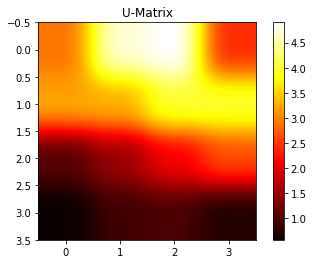

In [207]:
sm.show_distance_matrix()

# 8 Forecasting

## 8.1 Fit an ARIMA model to a timeseries.

### a) Plot the timeseries.

In [208]:
# Read in new data set
air = pd.read_csv('data/air.csv')
air.head()

,DATE,AIR
0,01/01/1949,112
1,02/01/1949,118
2,03/01/1949,132
3,04/01/1949,129
4,05/01/1949,121


In [209]:
air["DATE"] = pd.to_datetime(air["DATE"], infer_datetime_format = True)
air.index = air["DATE"].values
air.head()

,DATE,AIR
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


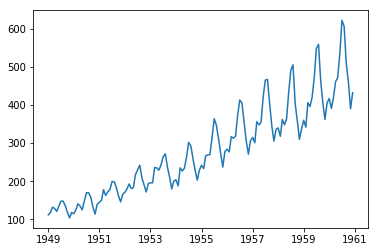

In [210]:
plt.plot(air.index, air["AIR"])
plt.show()

### b) Fit an ARIMA model and predict 2 years (24 months).

In [211]:
# import library
import pyflux as pf

In [212]:
# ar = 12 is necessary to indicate the seasonality of data
model = pf.ARIMA(data = air, ar = 12, ma = 1, integ = 0, target = 'AIR', family = pf.Normal())
x = model.fit("MLE")

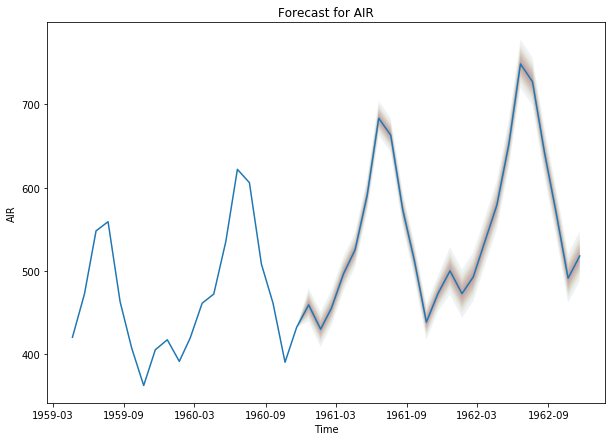

In [213]:
model.plot_predict(h = 24)

## 8.2 Fit a Simple Exponential Smoothing model to a timeseries.

### a) Plot the timeseries.

In [214]:
# Read in new data set
usecon = pd.read_csv('data/usecon.csv')
usecon.head()

,DATE,AIRRPMD,AIRRPMT,CHEMICAL,COAL,DURABLES,HS1FAM,HSTOTAL,NONDUR,PETROL,TOBACCO,VEHICLES
0,JAN71,8.439995,10.519997,3896,49780,26617,NaN,NaN,23314,2154,425,4367
1,FEB71,7.199997,8.989998,4346,47029,29829,NaN,NaN,25407,2250,433,5147
2,MAR71,8.169998,10.139999,4318,56920,31336,NaN,NaN,25832,2165,445,5418
3,APR71,9.019997,11.149994,4536,54336,30484,NaN,NaN,25773,2223,440,4897
4,MAY71,8.399994,10.839996,4454,50442,31008,NaN,NaN,25560,2190,458,5002


In [215]:
petrol = usecon["PETROL"]

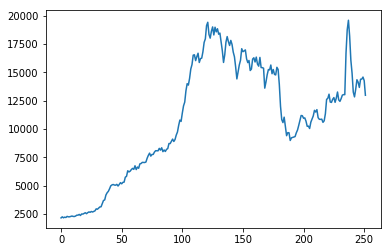

In [216]:
plt.plot(petrol)
plt.show()

### b) Fit a Simple Exponential Smoothing model, predict 2 years (24 months) out and plot predictions.

In [217]:
def simple_exp_smoothing(data, alpha, n_preds):
    # Eq1:
    output = [data[0]]
    # Smooth given data plus we want to predict 24 units 
    # past the end
    for i in range(1, len(data) + n_preds):
        # Eq2:
        if (i < len(data)):
            output.append(alpha * data[i] + (1 - alpha) * data[i-1])
        else:
            output.append(alpha * output[i-1] + (1 - alpha) * output[i-2])
    return output

In [218]:
pred = simple_exp_smoothing(petrol, 0.9999, 24)

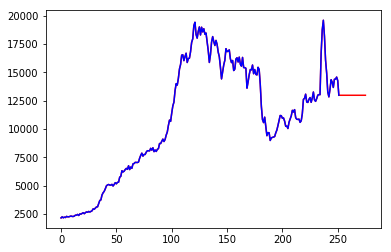

In [219]:
plt.plot(pd.DataFrame(pred), color = "red")
plt.plot(petrol, color = "blue")
plt.show()

## 8.3 Fit a Holt-Winters model to a timeseries.

### a) Plot the timeseries.

In [220]:
vehicle = usecon["VEHICLES"]

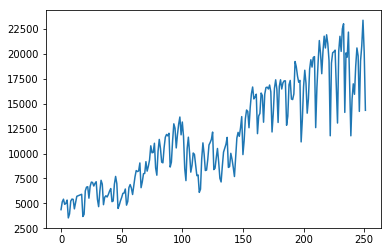

In [221]:
plt.plot(vehicle)
plt.show()

### b) Fit a Holt-Winters additive model, predict 2 years (24 months) out and plot predictions.

In [222]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [223]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [224]:
def triple_exponential_smoothing_add(series, slen, alpha, beta, gamma, 
                                     n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [225]:
add_preds = triple_exponential_smoothing_add(vehicle, 12, 0.5731265, 0, 0.7230956, 24)

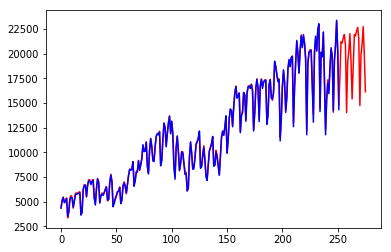

In [226]:
plt.plot(pd.DataFrame(add_preds), color = "red")
plt.plot(vehicle, color = "blue")
plt.show()

## 8.4 Fit a Facebook Prophet forecasting model to a timeseries.

In [227]:
# import library
from fbprophet import Prophet # pip install pystan; pip install fbprophet

In [228]:
air = pd.read_csv("data/air.csv")
air.head()

,DATE,AIR
0,01/01/1949,112
1,02/01/1949,118
2,03/01/1949,132
3,04/01/1949,129
4,05/01/1949,121


In [229]:
air_df = pd.DataFrame()
air_df["ds"] = pd.to_datetime(air["DATE"], infer_datetime_format = True)
air_df["y"] = air["AIR"]
air_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [230]:
m = Prophet(yearly_seasonality = True, weekly_seasonality = False)
m.fit(air_df)

In [231]:
future = m.make_future_dataframe(periods = 24, freq = "M")
forecast = m.predict(future)

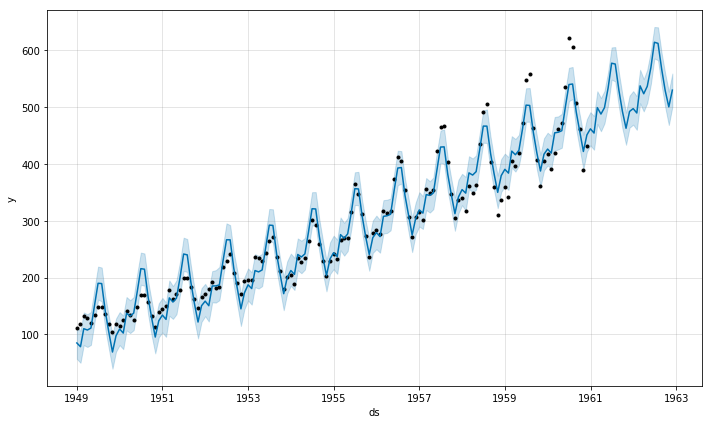

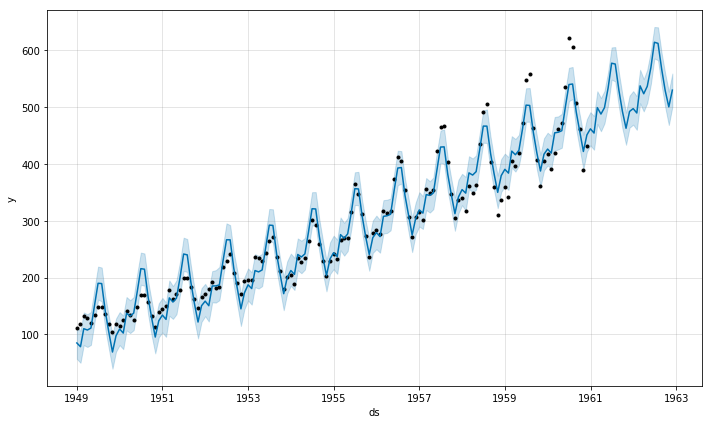

In [232]:
m.plot(forecast)

# 9 Model Evaluation & Selection

## 9.1 Evaluate the accuracy of regression models.

### a) Evaluation on training data.

In [233]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [234]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [235]:
# import library
from sklearn.ensemble import RandomForestRegressor

In [236]:
# Random Forest Regression Model
rfMod = RandomForestRegressor(random_state = 29)
rfMod.fit(train.drop(["Target"], axis = 1), train["Target"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=29,
           verbose=0, warm_start=False)

In [237]:
# Evaluation on training data
predY = rfMod.predict(train.drop(["Target"], axis = 1))

In [238]:
# import library
from sklearn.metrics import r2_score

In [239]:
# Determine coefficient of determination score
r2_rf = r2_score(train["Target"], predY)
print("Random forest regression model r^2 score (coefficient of determination): %f" % r2_rf)

Random forest regression model r^2 score (coefficient of determination): 0.975233


### b) Evaluation on testing data.

In [240]:
train = pd.read_csv('data/boston_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
1,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
2,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8


In [241]:
test = pd.read_csv('data/boston_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
1,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
2,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
3,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
4,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [242]:
# import library
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [243]:
# Random Forest Regression Model (rfMod)
rfMod = RandomForestRegressor(random_state = 29)
rfMod.fit(train.drop(["Target"], axis = 1), train["Target"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=29,
           verbose=0, warm_start=False)

In [244]:
# Evaluation on testing data
predY = rfMod.predict(test.drop(["Target"], axis = 1))

In [245]:
# Determine coefficient of determination score
r2_rf = r2_score(test["Target"], predY)
print("Random forest regression model r^2 score (coefficient of determination): %f" % r2_rf)

Random forest regression model r^2 score (coefficient of determination): 0.833687


## 9.2 Evaluate the accuracy of classification models.

### a) Evaluation on training data.

In [246]:
train = pd.read_csv('data/digits_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,3.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,2.0,16.0,16.0,15.0,12.0,9.0,0.0,2
1,0.0,0.0,1.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.0,16.0,11.0,1.0,0.0,6
2,0.0,0.0,12.0,16.0,16.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,3.0,15.0,13.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,15.0,2.0,0.0,0.0,8
4,0.0,0.0,7.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,16.0,16.0,6.0,0.0,0.0,3


In [247]:
test = pd.read_csv('data/digits_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,16.0,15.0,0.0,0.0,6
1,0.0,0.0,0.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,3.0,0.0,0.0,4
2,0.0,0.0,8.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,16.0,15.0,7.0,0.0,0.0,3
3,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,0.0,0.0,0.0,4
4,0.0,1.0,14.0,16.0,16.0,11.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2.0,13.0,12.0,15.0,2.0,0.0,0.0,8


In [248]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [249]:
# Random Forest Classification Model
rfMod = RandomForestClassifier(random_state = 29)
rfMod.fit(train.drop(["Target"], axis = 1), train["Target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=29,
            verbose=0, warm_start=False)

In [250]:
# Evaluation on training data
predY = rfMod.predict(train.drop(["Target"], axis = 1))

In [251]:
# Determine accuracy score
accuracy_rf = accuracy_score(train["Target"], predY)
print("Random forest model accuracy: %f" % accuracy_rf)

Random forest model accuracy: 1.000000


### b) Evaluation on testing data.

In [252]:
train = pd.read_csv('data/digits_train.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,3.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,2.0,16.0,16.0,15.0,12.0,9.0,0.0,2
1,0.0,0.0,1.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.0,16.0,11.0,1.0,0.0,6
2,0.0,0.0,12.0,16.0,16.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,3.0,15.0,13.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,15.0,2.0,0.0,0.0,8
4,0.0,0.0,7.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,16.0,16.0,6.0,0.0,0.0,3


In [253]:
test = pd.read_csv('data/digits_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,16.0,15.0,0.0,0.0,6
1,0.0,0.0,0.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,3.0,0.0,0.0,4
2,0.0,0.0,8.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,16.0,15.0,7.0,0.0,0.0,3
3,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,0.0,0.0,0.0,4
4,0.0,1.0,14.0,16.0,16.0,11.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2.0,13.0,12.0,15.0,2.0,0.0,0.0,8


In [254]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [255]:
# Random Forest Classification Model (rfMod)
rfMod = RandomForestClassifier(random_state = 29)
rfMod.fit(train.drop(["Target"], axis = 1), train["Target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=29,
            verbose=0, warm_start=False)

In [256]:
# Evaluation on testing data
predY = rfMod.predict(test.drop(["Target"], axis = 1))

In [257]:
# Determine accuracy score
accuracy_rf = accuracy_score(test["Target"], predY)
print("Random forest model accuracy: %f" % accuracy_rf)

Random forest model accuracy: 0.940741


## 9.3 Evaluation with cross validation.

### a) KFold

In [258]:
# Notice we are using a new data set that need to be read into the environment 
breastcancer = pd.read_csv('data/breastcancer.csv')
breastcancer.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [259]:
# import library
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [260]:
X = breastcancer.drop(["Target"], axis = 1)
Y = breastcancer["Target"]

In [261]:
kfold = model_selection.KFold(n_splits = 5, random_state = 29)
rfMod = RandomForestClassifier(random_state = 29)
results = model_selection.cross_val_score(rfMod, X, Y, cv = kfold)

In [262]:
print("Accuracy: %.2f%% +/- %.2f%%" % (results.mean() * 100, results.std() * 100))

Accuracy: 94.38% +/- 2.39%


### b) ShuffleSplit

In [263]:
breastcancer = pd.read_csv('data/breastcancer.csv')
breastcancer.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
3,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1


In [264]:
# import library
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [265]:
X = breastcancer.drop(["Target"], axis = 1)
Y = breastcancer["Target"]

In [266]:
shuffle = model_selection.ShuffleSplit(n_splits = 5, random_state = 29)
rfMod = RandomForestClassifier(random_state = 29)
results = model_selection.cross_val_score(rfMod, X, Y, cv = shuffle)

In [267]:
print("Accuracy: %.2f%% +/- %.2f%%" % (results.mean() * 100, results.std() * 100))

Accuracy: 95.09% +/- 0.70%


The end.